## 8. Karar Ağacı Regresyonu (Decision Tree Regression)

Karar ağacı; veriyi belirli kurallar göre dallara ayırarak sınıflandırma veya tahmin yapan bir algoritmadır. Regresyonda ise **sayısal bir değeri tahmin eder.**

Temel Çalışma Mantığı

1. Veriyi Dallara Ayırma:
   * Her düğümde (node), bir özellik (feature) ve bir eşik değeri (threshold) seçilir.
   * Mesela "Yaş <= 30" gibi bir koşulla veri iki alt gruba ayrılır.
2. Yaprak Düğümlerde (leaf) Tahmin:
   * Her yaprak düğümde, o bölgedeki verilerin **ortalama değeri** tahmin olarak kullanır.
   * Mesela "Yaş>30 ve Maaş<5000" grubundaki hedef değişkenin ortalaması 42.3

Genel Tahmin Fonksiyonu:

$$
\hat f(x) = \sum_{m=1} ^{M} c_m 1_{x\in R_m}
$$

* $M$ : Yaprak düğüm sayısı
* $R_m$ : m. yaprak düğümün kapsadığı bölge.
* $c_m$ : Bölge $R_m$ içindeki hedef değerlerin ortalaması,
* $1_{x\in R_m}$ : Girdi $x$'in $R_m$ bölgesine ait olup olmadığını belirten gösterim (1 ise dahil, 0 ise değil).

Avantajları:
* Doğrusal olmayan ilişkileri yakalar,
* Kategorik değişkenlerle çalışabilir,
* Yorumlanması kolay.

Dezavantajları:
* Overfitting eğilimi,
* Küçük veri değişikliklerine hassas.
  

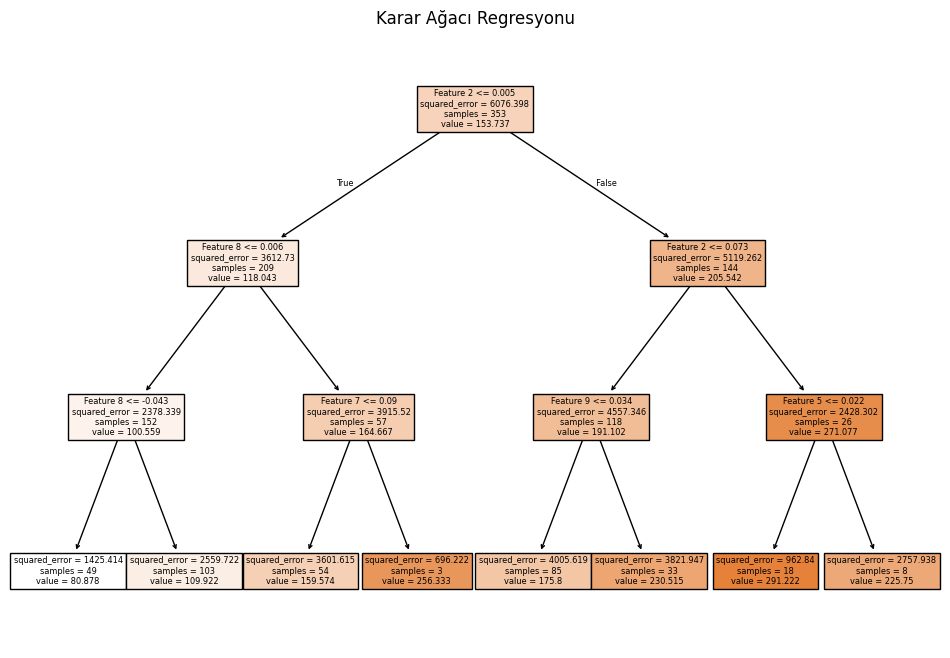

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Veri yükle
X, y = load_diabetes(return_X_y=True)
# return_X_y = True --> X girdi verileri (öznitelik/features), y hedef değerler (etiketler/labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluştur ve eğit
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
# max_depth = 3 --> ağacın maksimum  derinliği belli ederiz
tree.fit(X_train, y_train)

# Tahmin
y_pred = tree.predict(X_test)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])])
# tree : Eğitimden geçmiş karar ağacı modelidir. (DTR ya da DTC)
# filled = True --> Görsel olarak hangi düğümlerin yüksek/düşük çıktılar verdiğini anlamayı kolaylaştırır.
# feature_names --> feature isimlerini belirtir. Biz de özellik isimleri olmadığı için 1,2,3,4, ... yazacak.
    # X.shape[1] --> veri setindeki sütun sayısı
plt.title("Karar Ağacı Regresyonu")
plt.show()

## 9. Rastgele Orman Regresyonu (Random Forest Regression)

Random Forest, birden fazla karar ağacının (decision tree) birleşiminden oluşan bir **ensemble learning (topluluk öğrenme)** yöntemidir. Regresyon problemlerinde, her ağacın tahminlerinin **ortalamasını** alınarak daha güçlü ve istikrarlı bir model oluşturulur. 

Temel mantık: "Çok sayıda zayıf modelin birleşimi, tek bir güçlü model yaratır."

Nasıl Çalışır?

1. Ağaçlar Oluşturma (Bootstrap Aggregating - Bagging):
   * Eğitim verisinden rastgele alt örneklemler (bootstrap samples) seçilir.
   * Her ağaç, bu alt örneklemler üzerinde eğitilir.
2. Rastgelelik Eklenmesi:
   * Her düğümde (node) sadece rastgele bir alt küme özellik (feature) kullanılır. (max_features parametresi)
   * Böylece ağaçlar birbirinden farklılaşır ve modelin varyansı azalır.
3. Tahmin Yapma:
   * Her ağaç bir tahmin üretir.
   * Regresyonda, bu tahminlerin **ortalamaası** alınır.


Denklem:

Random Forest'in tahmini, $T$ ağacın tahminlerinin ortalamasıdır:

$$
\hat y = \frac{1}{T} \sum_{i=1}^{T} f_i(x)
$$

* $f_i(x)$ : $i.$ ağacın tahmini,
* $T$ : Ağaç sayısı (n_estimators).

Avantajları:
* Aşırı Öğrenmeyi Önler --> Çok sayıda ağaç ve rastgelelik sayesinde overfitting riski düşüktür.
* Doğrusal Olmayan İlişkiler --> Karmaşık veri yapılarını modelleyebilir.
* Outlier Direnci --> Ortalama alma işlemi aykırı değerlerin etkisini azaltır.
* Özellik Önem Analizi --> Model hangi özelliklerin daha kritik olduğunu gösterir.

Dezavantajları:
* Daha yavaş ve daha fazla bellek tüketir. (çok sayıda ağaç)
* Yorumlaması tek bir karar ağacına göre zordur.
* Zamanla çok büyük veri setlerinde eğitim süresi artar.

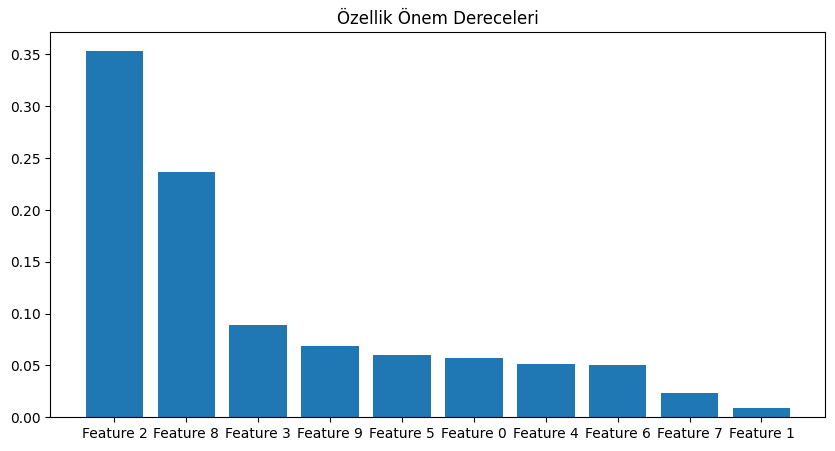

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Veri setini yükle
X, y = load_diabetes(return_X_y=True)

# Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Özellik Önem Dereceleri")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [f"Feature {i}" for i in indices])
plt.show()

Kritik Hiperparametreler:
* n_estimators --> Ağaç Sayısı --> 100-500 (ne kadar çoksa o kadar iyi, ancak hesaplama maliyeti artar)
* max_depth --> Ağaçların maksimum derinliği --> 3-10 (overfitting'i önlemek için)
* max_features --> Her düğümde kullanılacak maksimum özellik sayısı --> "sqrt" (özellik sayının karekökü) veya "log2"
* min_samples_split --> Bir düğümün bölünebilmesi için gereken minimum örnek sayısı --> 2-10 (küçük değerler overfitting'e yol açma ihtimali var)
* min_samples_leaf --> Bir yaprak düğümdeki minimum örnek sayısı --> 1-5

| Model            | Artıları                              | Eksileri                                 |
|------------------|----------------------------------------|-------------------------------------------|
| Random Forest    | Yüksek doğruluk, outlier direnci.     | Yavaş çalışabilir (büyük veride).        |
| Karar Ağacı      | Hızlı, yorumlanabilir.                | Aşırı öğrenme eğilimli.                  |
| Linear Regression| Hızlı, yorumlanabilir.                | Doğrusal olmayan ilişkilerde başarısız.  |
| SVR              | Doğrusal olmayan veride iyi.          | Hiperparametre ayarı zor.                |


# Model Değerlendirme Metrikleri

## 1. Ortalama Mutlak Hata - Mean Absolute Error (MAE) 

MAE (Ortalama Mutlak Hata), bir regresyon modelinin tahminlerindek **ortalama hata büyüklüğünü** ölçen bir metriktir. Gerçek değerler ile tahminler arasındaki **mutlak farkların ortalamasını** alır. Basit ve yorumlanabilir olmasıyla sıkça kullanılır.

Denklem:

$$
MAE = \frac {1}{n} \sum_{i=1}^n |y_i - \hat y_i|
$$

* $y_i$ : Gerçek değeler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı (Veri sayısı),
* $|y_i - \hat y_i|$ : Tahmin hatasının mutlak değeri

Mesela elimizde 4 gözlem olduğunu var sayalım:

| Gerçek Değer (y) | Tahmin (ŷ) | Hata | Mutlak Hata |
| ---------------- | ---------- | ---- | ----------- |
| 10               | 12         | +2   | 2           |
| 8                | 6          | -2   | 2           |
| 15               | 14         | -1   | 1           |
| 5                | 7          | +2   | 2           |

<br></br>

$$
MAE = \frac {2 + 2 + 1 +2}{4} = \frac{7}{4} = 1.75
$$

Avantajları:
* Yorumlaması kolay:
  * Hatanın ortalama büyüklüğünü gösterir.
* Aykırı Değelere Dirençli. (Outlier)
  * Mutlak değer kullandığı için, aşırı değerlerden **RMSE**'ye göre daha az etkilenir.
* Simetrik:
  * Pozitif ve negatif hataları eşit şekilde cezalandırır.

**Dikkat Edilmesi Gerekenler:**
* Hataların yönünü (pozitif/negatif) göstermez. (mutlak değer kullanır.)
  * Çözüm olarak **Mean Bias Error** **(MBE)** eklenebilir.
* Optimizasyon Zorluğu:
  * MAE'nin türevi (Gradyan) süreksiz olduğu için, bazı optimizasyon algoritmalarında (örn: Gradient Descent) **RMSE** daha sık kullanılır.
* Ölçek Bağımlılığı:
  * Farklı ölçekteki verilerin MAE'leri karşılaştırılmaz. Yani:
    * 1.000.000 TL konut fiyatının MAE değeri 50.000 diyelim.
    * Sınav puanı 0-100 arasında MAE değeri 5.
    * Bu iki MAE değerini kıyaslama imkanım yok. Her ikisininde hata payı %5 ama farklı ölçeklerden olaya bakıyorum.
    * Çözüm olarak (MAE / Veri aralığı) olabilir.
* Sıfıra ne kadar yakınsa, model o kadar iyi tahmin yapıyor demektir.

| Karşılaştırma    | MAE        | RMSE | 
| ---------------- | ---------- | ---- |
| Hesaplama             | Mutlak farkların ortalaması         | Hataların karelerinin ort. karekökü   | 
| Outlier Duyarlılığı                | Daha az duyarlı          | Aşırı değerleri daha sert cezalandırır   |
| Yorum               | Ortalama mutlak hata         | Hataların büyülğüne daha fazla ağırlık verir   | 

<br></br>

Hangi metrik kullanılmalı?
* Outlier'lar (aykırı değerler) önemliyse --> RMSE
* Tüm hatalar eşit ağırlıklı ise --> MAE

In [9]:
# Numpy ile hesaplama

import numpy as np

y_true = np.array([10, 15, 20])
y_pred = np.array([12, 14, 18])

MAE = np.mean(np.abs(y_true - y_pred))
print(f"MAE: {MAE:.2f}")

MAE: 1.67


In [10]:
# Scikit-learn kullanarak hesaplama yapalım.

from sklearn.metrics import mean_absolute_error

y_true = np.array([10, 15, 20])
y_pred = np.array([12, 14, 18])

MAE = mean_absolute_error(y_true, y_pred)
print(f"MAE: {MAE:.2f}")

MAE: 1.67


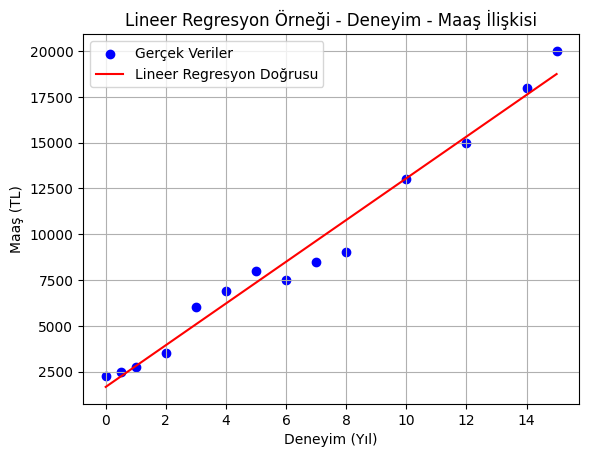

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
MAE (Ortalama Mutlak Hata): 680.18


In [11]:
# Deneyim Maaş örneği MAE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# Mae değeri
y_pred_train = model_LinearReg.predict(X)
mae = mean_absolute_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")

## 2. Ortalama Kare Hata - Mean Squared Error (MSE)

**MSE (Ortalama Kare Hata)**, bir regresyon modelinin tahminlerinin gerçek değerlerden ne kadar saptığını ölçen istatistiksel bir metriktir. Hataların **karelerinin ortalamasını** alır ve büyük hataları daha sert cezalandırır.

Denklem:

$$
MSE = \frac{1}{n} \sum_ {i=1}^{n} (y_i- \hat y_i)^2
$$

* $y_i$ : Gerçek değerler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı.

| Gerçek $y_i$                     | Tahmin $\hat y_i$               | Kare Hata $(y_i - \hat y_i)^2$                                    |
| --------------------------- | ----------------- | -------------------------------------- |
| 10                   | 12       | $(10-12)^2 = 4$                          |
| 15          | 14                             | $(15-14)^2 = 1$ |
| 20          | 18 | $(20-18)^2 = 4$                    |

<br></br>
$$
MSE = \frac{4 +1+4}{3} = 3
$$

Yorum: Modelin tahminleri, gerçek değerlerden ortalama **3 brim $^2$** kadar uzaklaştığını söyler.

Özellikleri:
* Büyük Hataları Cezalandırır:
  * Kare alma işlemi, büyük hataları (outlier'ları) küçük hatalara göre **daha ağır şekilde** cezalandırır.
* Birimi: Orijinal verinin biriminin karesidir. TL $^2$, m $^2$, bu yüzden **RMSE (karekök MSE)** sıkça kullanılır.
* Optimizayon için Uygundur: 
  * Türevi alınabilir olduğu için gradient descent gibi algoritmalarda kullanılır.

Avantajları:
* Özellikle büyük hatalara karşı duyarlı olduğu için bazı durumlarda daha uygun.
* Matematiksel olarak türevlenebilir olduğu için **optimizasyon işlemlerinde tercih edilir** (gradient descent).

Dezavantajları:
* Yorumlaması zor olabilir, birimi "karesel"
* Aykırı değerlere karşı hassas olabilir.

| Özellik                     | MAE               | MSE                                    |
| --------------------------- | ----------------- | -------------------------------------- |
| Hata türü                   | Mutlak fark       | Karesel fark                           |
| Aykırı değerlere duyarlılık | Daha az           | Daha fazla                             |
| Yorumu kolay mı?            | Evet (aynı birim) | Hayır (kare birim)                     |
| Cezalandırma                | Lineer            | Karesel (büyük hataya daha fazla ceza) |


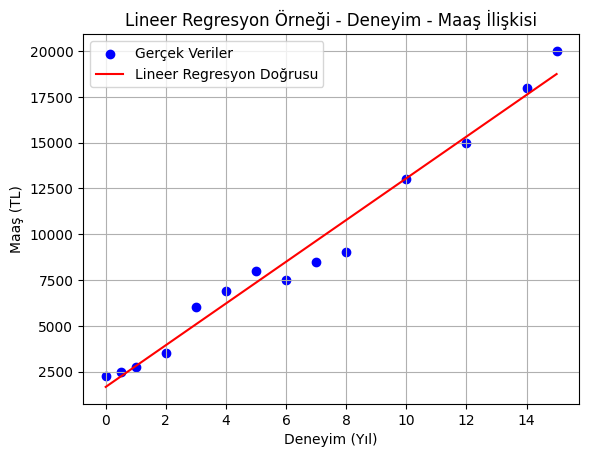

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
MSE (Ortalama Kare Hata): 685945.85


In [12]:
# Deneyim Maaş örneği MSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MSE hesaplama
y_pred_train = model_LinearReg.predict(X)
mse = mean_squared_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"MSE (Ortalama Kare Hata): {mse:.2f}")

0.7544122989062961
0.9290927841395877


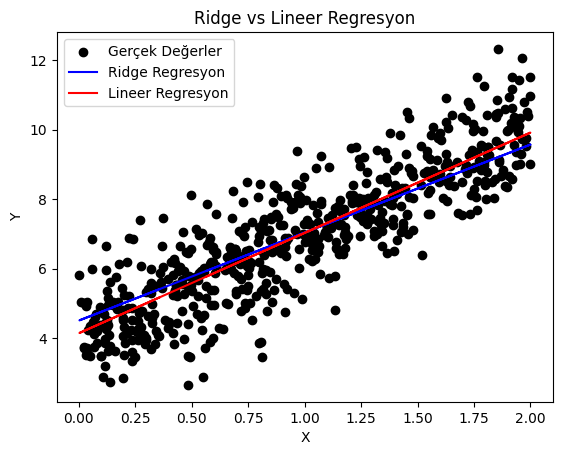

* Yorumlamak zor olduğu için RMSE değerine bakalım.

## 3. Kök Ortalama Kare Hate - Root Mean Squared Error (RMSE)

**RMSE (Kök Ortalama Kare Hata)**, regresyon modellerinin tahmin performansını ölçmek için kullanılan bir metriktir. MSE'nin (Mean Squared Error) karekökü alınarak hesaplanır ve hatayı orijinal veri birimleriyle ifade eder. Büyük hataları daha belirgin şekilde cezalandırır.

Denklem:

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y_i)^2 }
$$

* $y_i$ : Gerçek değerler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı.

$$
RMSE = \sqrt 3 \approx 1.73
$$

Yorum: RMSE değerimiz 1.73 çıktı diyelim. Modelin tahminleri, gerçek değerlerden ortalama **1.73** birim sapıyor diyebiliriz.

Avantajları:
* Yorumlaması kolaydır.
  * Sonuç tahmin edilen değişkenle aynı birimdedir. (TL, kg, vb..)
* Büyük hatalara daha fazla ceza verir. 
  * Hataların karesi alındığı için, büyük hatalar daha fazla etki eder.
* MSE'den daha anlaşılır.
  * Kare alma işlemi geri alındığı için birim doğrudan kullanılabilir.

Dezavantajları:
* Aykırı değerlere (outlier) **duyarlıdır,** çünkü kare alma işlemi büyük hataları büyütür.
* MAE'ye göre daha fazla etkilenir.

<br></br>
Dikkat Edilmesi Gerekenler:
* Outlier Duyarlılığı:
  * RMSE, birkaç büyük hatanın metriği önemli ölçüde arttırmasına neden olabilir. Outlier'lar varsa MAE daha iyi bir seçim olabilir.
* Karşılaştırma İçin Aynı Ölçek:
  * Farklı veri setlerinin RMSE'lerini karşılaştırırken, veri ölçeklerinin aynı olduğundan emin olmamız gerekir.
* Sıfıra Yakınlık:
  * **Mükemmel bir modelde RMSE = 0 olur. Değer ne kadar küçükse, model o kadar iyidir.**

<br></br>
Hangi Metrik Kullanılmalı?

* Outlier önemliyse ver birim önemliyse --> RMSE
* Tüm hatalar eşit ağırlıkta ise --> MAE
* Model optimizasyonu yapılıyorsa --> MSE

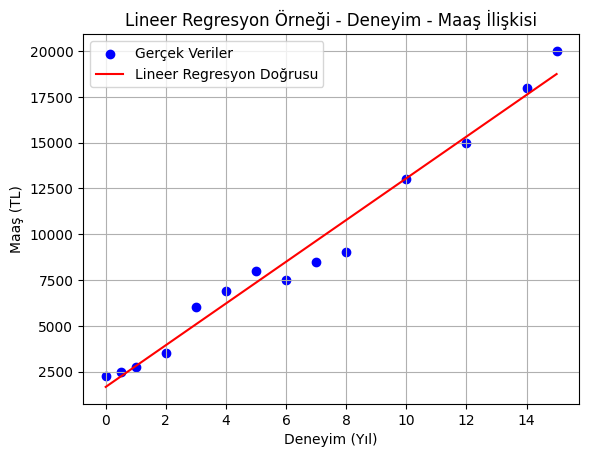

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
RMSE (Ortalama Kare Hata): 685945.85
RMSE (Ortalama Kare Hata): 828.22


In [21]:
# Deneyim Maaş örneği RMSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MSE hesaplama
y_pred_train = model_LinearReg.predict(X)
mse = mean_squared_error(y, y_pred_train)
mse_ = root_mean_squared_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"RMSE (Ortalama Kare Hata): {mse:.2f}")
print(f"RMSE (Ortalama Kare Hata): {mse_:.2f}")

## 4. R-Kare - R-Squared ($R^2$)

$R^2$ **(R-Kare)**, bir regresyon modelinin **bağımlı değişkenin (hedef) varyansını ne kadar iyi açıkladığını** ölçen bir metriktir. **0 ile 1** arasında değer alır ve yüzde olarak yorumlanabilir.

* **1'e Yakın (Örn: 0.9):** Model, verideki varyansın %90'ını açıklıyor (mükemmele yakın).
* **0'a Yakın (Örn: 0.2):** Model, y'nin varyansını zayıf açıklıyor.
* **Negatif Değerler:** Model, basit bir ortalamadan daha kötü performans gösteriyor.


$R^2 = 0.85$ ise, model hedef değişkendeki varyansın %85'ini açıklıyor ama kalan %15 ise model tarafından açıklanamayan hatalar veya rastgeleliktir.

<br></br>
Denklem:

$$
R^2 = 1 - \frac {SS_{res}} {SS_{tot}}
$$

* $SS_{res} = \sum_{i=1}^{n} (y_i - \hat y_i)^2$ --> Modelin tahmin hatalarının karelerinin toplamı (residual sum of squares) 
* $SS_{tot} = \sum_{i=1}^{n} (y_i - \hat y_i)^2$ --> Gerçek değerlerin ortalamaya göre kare farklarının toplamı (total sum of squares)

Önemli.
* Özellik Sayısına Duyarlılık:
  * Modele gereksiz özellikler eklendikçe $R^2$ yapay olarak artar. Bu sorunu çözmek için **Adjusted $R^2$** kullanılır.

Adjusted $R^2$ Denklemi:

$$
1 - \frac {(1-R^2)(n-1)} {n-p-1}
$$

* $n$ : Örnek Sayısı,
* $p$ : Özellik Sayısı.
<br></br>
* $R^2$ --> Basit ve anlaşılırken (avantaj), Özellik sayısı arttıkça şişer (dezavantaj).
* Adjusted $R^2$ --> Gereksiz özellikleri cezalandırırken (avantaj), Yorumu $R^2$ kadar sezgisel değil (dezavantaj).

<br></br>
Dikkat Edilmesi Gerekenler:

* Yüksek $R^2$ Her Zaman İyi Değildir:
* Overfitting olmuş bir modelde $R^2$ yüksek çıkabilir, ancak yeni verilerde kötü performans gösterir.
* Lineer İlişki Varsayımı:
  * $R^2$, lineer modeller için tasarlanmıştır. Doğrusal olmayan modellerde yanıltıcı olabilir.
* Sabit Terim (Intercept) Önemli:
  * Modelde sabit terim ($b_0$ ya da $a$) yoksa $R^2$ negatif çıkabilir.

Proje: Bir sağlık veri setinde, hastaların kan basıncını tahmin eden model:

* $R^2$ = 0.72
* Anlamı: Model, kan basıncı varyansının %72'sini açıklıyor.
* Karar:
  * $R^2$ > 0.6 kabul edilebilir sayılıyorsa → Model kullanıma alınır.

$R^2$ ile Model Karşılaştırma
Aynı veri üzerinde iki model:
* Model A: $R^2$ = 0.85
* Model B: $R^2$ = 0.78

Sonuç: Model A daha iyidir (daha yüksek $R^2$).

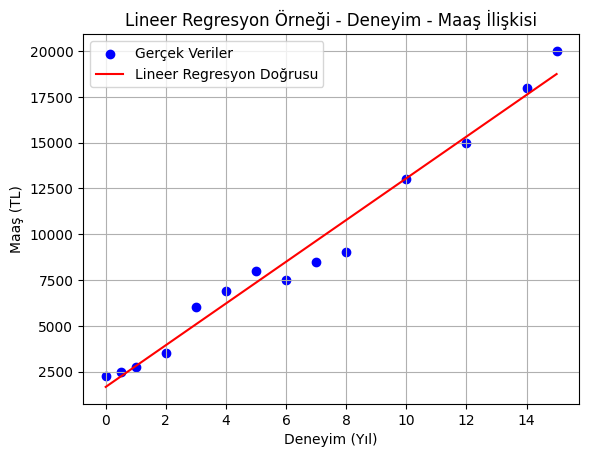

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
R^2 (R^2): 0.98


In [22]:
# Deneyim Maaş örneği R^2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MSE hesaplama
y_pred_train = model_LinearReg.predict(X)
r2 = r2_score(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"R^2 (R^2): {r2:.2f}")


## 5. Ortalama Mutlak Yüzde Hata - Mean Absolute Percentage Error (MAPE)

**MAPE (Ortalama Mutlak Yüzde Hata),** bir regresyon modelinin tahmin hatalarını **yüzde (%)** cinsinden ölçen bir performans metriğidir. Gerçek değerlerin ne kadarının **hata olarak kaybedildiğini** gösterir ve özellikle **ölçeklenmiş hata analizi** için idealdir.

Denklem:

$$
MAPE = \frac {100\%}{n} \sum_{i=1}^{n} \left | \frac{y_i - \hat y_i}{y_i} \right |
$$

* $y_i$ : Gerçek değerler,
* $\hat y_i$ : Tahmin edilen değerler,
* $n$ : Örnek sayısı.

NOT:
* $y_i = 0$ ise MAPE tanımsızdır (sıfıra bölme hatası)
* Hatalar % olarak ifade edilir. MAPE = %5 --> Tahminler ortalama %5 hatalı

Özellikleri
* Yüzdesel Yorum Kolaylığı:
  * Hatalar % cinsinden olduğu için **iş birimleriyle kolay iletişim sağlar.**
  * Örn: Tahminlerde ortalama %5 hata var.
* Ölçek Bağımsızdır:
  * Verinin biriminden (TL, °C) bağımsızdır. Farklı ölçekteki modeller karşılaştırılabilir.
* Pozitif Değerler Gerektirir:
  * Gerçek değerler $(y_i)$ **sıfır veya negatif** olamaz (paydaya bak).
* Asimetrik Cezalandırma:
  * Aynı mutlak hatayı üreten **fazla tahmin** ve **eksik tahmin** farklı yüzdelere dönüşebilir.

MAPE Kullanım Senaryoları

1. Satış Tahmini:
   * Gerçek satış: 1000 adet, Tahmin 950 adet --> hata %5
2. Finansal Projeksiyonlar:
   * Gerçek kâr: 1M TL, Tahmin 1.1M TL --> Hata %10
3. Envanter Yönerimi:
   * Gerçek talep: 200 birim, Tahmin 180 birim --> Hata 10%

Dikkat Edilmesi Gerekenler

1. Sıfır/Negatif Veri Problemi:
   * $y_i =0$ ise **sMAPE (Symmetric MAPE)** veya **MAE** kullan.
2. Asimetrik Cezalandırma:
   * Fazla tahmin $(\hat y_i > y_i)$ ve eksik tahmin $(\hat y_i < y_i)$ farklı yüzdeler üretebilir.
3. Aşırı Düşük Gerçek Değerler:
   * $y_i$ çok küçükse, hata yüzdesi aşırı büyüyebilir.

**sMAPE (Symmetric MAPE) Denklemi**

$$
sMAPE = \frac{100\%}{n} \sum \frac {|y_i - \hat y_i|} {(|y_i| + |\hat y_i |) / 2}
$$

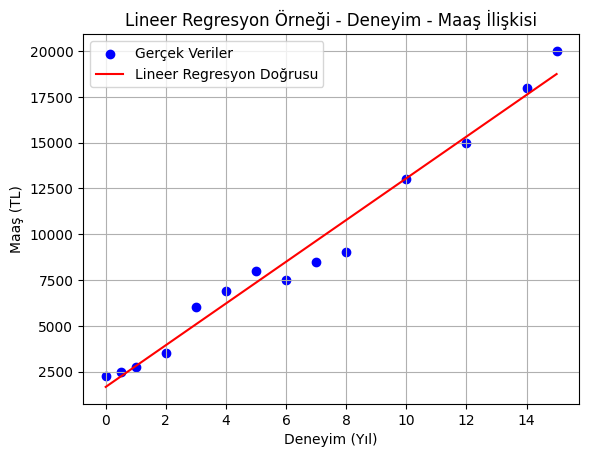

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]
MAPE : 0.10
MAPE (%): 10.13


In [24]:
# Deneyim Maaş örneği MAPE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

# Model oluşturma
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y)

# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = model_LinearReg.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", model_LinearReg.intercept_)
print("Eğim (Slpoe) (b):", model_LinearReg.coef_)

# MAPE hesaplama
y_pred_train = model_LinearReg.predict(X)
mape = mean_absolute_percentage_error(y, y_pred_train)
# y --> gerçek maaşlar
# y_pred_train --> Modelin tahmin ettiği maaaşlar (Girdi olarak eğitim veri X kullandık)
print(f"MAPE : {mape:.2f}")
print(f"MAPE (%): {mape * 100:.2f}")


En iyi parametreler: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


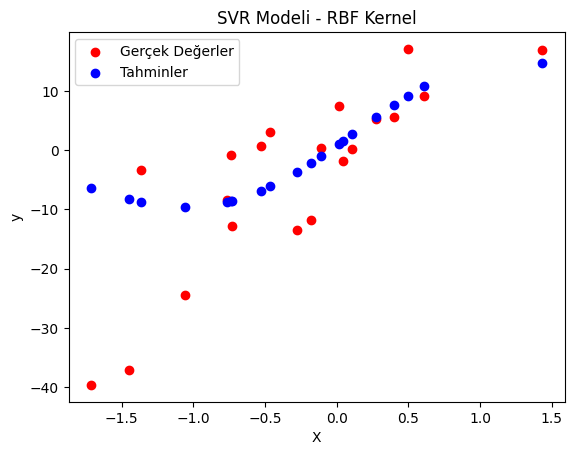

In [25]:
# Temel SVR Modeli

from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Örnek veri oluştur
X, y = make_regression(n_samples=100, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVR modeli (RBF kernel)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Tahmin
y_pred = svr.predict(X_test)



# ----------------------------------------

# Hiperparametre Optimizasyonu (GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Parametre ağı
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

# ------------------------------------------

# import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='red', label='Gerçek Değerler')
plt.scatter(X_test, y_pred, color='blue', label='Tahminler')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR Modeli - RBF Kernel')
plt.legend()
plt.show()